# Decision Trees

#### Instructions:
- Write modular code with relevant docstrings and comments for you to be able to use
functions you have implemented in future assignments.
- All theory questions and observations must be written in a markdown cell of your jupyter notebook.You can alsoadd necessary images in `imgs/` and then include it in markdown. Any other submission method for theoretical question won't be entertained.
- Start the assignment early, push your code regularly and enjoy learning!

### Question 1 Optimal DT from table
**[20 points]**\
We will use the dataset below to learn a decision tree which predicts if people pass machine
learning (Yes or No), based on their previous GPA (High, Medium, or Low) and whether or
not they studied. 

| GPA | Studied | Passed |
|:---:|:-------:|:------:|
|  L  |    F    |    F   |
|  L  |    T    |    T   |
|  M  |    F    |    F   |
|  M  |    T    |    T   |
|  H  |    F    |    T   |
|  H  |    T    |    T   |
    
 For this problem, you can write your answers using $log_2$
, but it may be helpful to note
that $log_2 3 ≈ 1.6$.

---
1. What is the entropy H(Passed)?
2. What is the entropy H(Passed | GPA)?
3. What is the entropy H(Passed | Studied)?
4. Draw the full decision tree that would be learned for this dataset. You do
not need to show any calculations.
---


### 1) H(passed) is inital entropy 
   H(passed) = -p1logp1 + -p2logp2 put p1 = 2/3 amd p2 = 1/3 
   H(passed) = -2/3 log2/3 -1/3log1/3 = 0.931

### 2) H(passed | GPA) consider all the given probablities 
   X = P(gpa = H)*(entroy when true and falsw when gpa is h) + P(gpa = M)*(entroy when true and falsw when gpa is m) + P(gpa = l)*(entroy when true and falsw when gpa is l)
   after solving
   H(passed|GPA) = 0.67

### 3) H(passed | studied)
   similar as to above caluculations 
   H(passed | studied ) = 0.466

### Question 2 DT loss functions
**[10 points]**
1. Explain Gini impurity and Entropy. 
2. What are the min and max values for both Gini impurity and Entropy
3. Plot the Gini impurity and Entropy for $p\in[0,1]$.
4. Multiply Gini impurity by a factor of 2 and overlay it over entropy.

### 1) gini impurity is a techinique to find the best feature to build a decision tree we will choose the feature which cause the most information gain and is calculate by G = 1-sigma(pi^2) while entopy is also similar here the formula is sigma -plogp in these both we generally consider gini impurity

### 2) Min value of gini impurity is 0 and max value is 0.5 min value of entropy is 0 and maximum value of entropy is 1

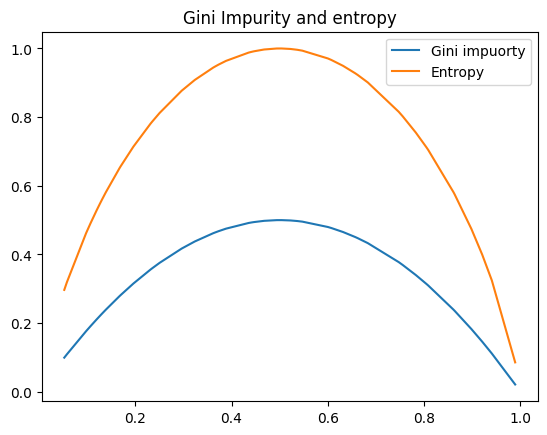

In [1]:
import matplotlib.pyplot as plt
import random 
import numpy as np
list_p = np.random.rand(50)
list_p.sort()
list_out = [2*i-2*i**2 for i in list_p]
list_out_double = [2*i for i in list_out]
list_entropy = [-(i*np.log2(i)+ (1-i)*np.log2(1-i)) for i in list_p]
plt.plot(list_p,list_out,label = "Gini impuorty")
plt.plot(list_p,list_entropy,label = "Entropy")
plt.legend()
plt.title("Gini Impurity and entropy")
plt.show()

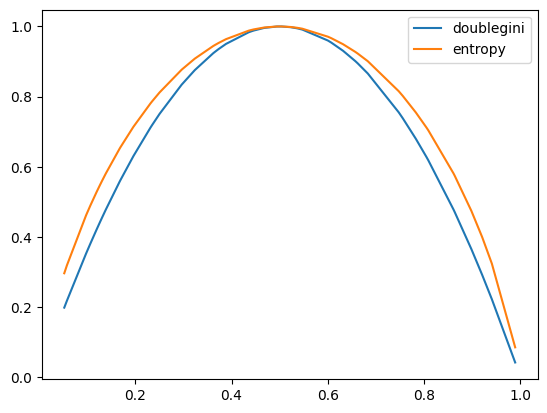

In [2]:
list_out_double = [2*i for i in list_out]
list_entropy = [-(i*np.log2(i)+ (1-i)*np.log2(1-i)) for i in list_p]
plt.plot(list_p,list_out_double,label = "doublegini")

plt.plot(list_p,list_entropy,label = "entropy")
plt.legend()
plt.show()

### Question 3 Training a Decision Tree  
**[40 points]**

You can download the spam dataset from the link given below. This dataset contains feature vectors and the lables of Spam/Non-Spam mails. 
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data

**NOTE: The last column in each row represents whether the mail is spam or non spam**\
Although not needed, incase you want to know what the individual columns in the feature vector means, you can read it in the documentation given below.
http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.DOCUMENTATION

**Download the data and load it from the code given below**

In [3]:
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import numpy as np
import random
from tabulate import tabulate

datafromfile = pd.read_csv("spambase.data", delimiter=",")
datafromfile = datafromfile.sample(frac = 1)




You can try to normalize each column (feature) separately with wither one of the following ideas. **Do not normalize labels**.
- Shift-and-scale normalization: substract the minimum, then divide by new maximum. Now all values are between 0-1
- Zero mean, unit variance : substract the mean, divide by the appropriate value to get variance=1.

In [4]:

X = datafromfile.iloc[:,:-1]
X = X.values.tolist()
X = np.array(X)
mine = np.min(X)
X = X-mine
X = X/np.max(X)

1. Split your data into train 80% and test dataset 20% 
2. **[BONUS]** Visualize the data using PCA . You can reduce the dimension of the data if you want. Bonus marks if this increases your accuracy.

*NOTE: If you are applying PCA or any other type of dimensionality reduction, do it before splitting the dataset*

In [5]:
train, test = train_test_split(datafromfile, test_size=0.2)
listdatatrain_y = train.iloc[ :, -1:]
listdatatrainx = train.iloc[:,:-1]
listdataframx = listdatatrainx.values.tolist()
listdataframy = listdatatrain_y.values.tolist()
listdatatest_y = test.iloc[ :, -1:]
listdatatestx = test.iloc[:,:-1]
listdatafram_testx = listdatatestx.values.tolist()
listdatafram_testy = listdatatest_y.values.tolist()

treeclass = tree.DecisionTreeClassifier()
treeclass.fit(listdataframx, listdataframy)
predictedtree = treeclass.predict(listdatafram_testx)
acc = accuracy_score(listdatafram_testy,predictedtree)
print(acc)



0.907608695652174


You need to perform a K fold validation on this and report the average training error over all the k validations. 
- For this , you need to split the training data into k splits.
- For each split, train a decision tree model and report the training , validation and test scores.
- Report the scores in a tabular form for each validation

In [6]:

K = KFold(n_splits=10 ,random_state=None, shuffle=False)
train, test = train_test_split(datafromfile, test_size=0.2)
Y = train.iloc[ :, -1:]
X = train.iloc[:,:-1]
X = X.values.tolist()
X = np.array(X)
Y = np.array(Y)
X_test = test.iloc[:,:-1]
Y_test = test.iloc[ :, -1:]
X_test = X_test.values.tolist()

X_test = np.array(X_test)
Y_test = np.array(Y_test)
list_out = []
for i,j in K.split(X):
    Xtrain = X[i]
    Xtest = X[j]
    Ytrain = Y[i]
    Ytest = Y[j]
    treeclass.fit(Xtrain, Ytrain)
    predictedtree = treeclass.predict(Xtest)
    predictedtreetrain = treeclass.predict(Xtrain)
    predictedtreetest = treeclass.predict(X_test)
    acc = accuracy_score(Ytest,predictedtree)
    acc1 = accuracy_score(predictedtreetrain,Ytrain)
    acc2 = accuracy_score(predictedtreetest,Y_test)
    list_out.append([acc,acc1,acc2])

firstcol = ["Validation_score", "Training_score", "Testing_score"]
table = tabulate(list_out, firstcol)
print(table)
    
   
    

  Validation_score    Training_score    Testing_score
------------------  ----------------  ---------------
          0.891304          0.999396         0.933696
          0.92663           0.999396         0.933696
          0.888587          0.999698         0.929348
          0.907609          0.999396         0.930435
          0.921196          0.999698         0.934783
          0.888587          0.999698         0.922826
          0.907609          0.999396         0.933696
          0.929348          0.999396         0.93587
          0.907609          0.999396         0.93913
          0.915761          0.999698         0.932609


### Question 4 Random Forest Algorithm
**[30 points]**

1. What is boosting, bagging and  stacking?
Which class does random forests belong to and why? **[5 points]**

### Bagging  is a techinique to avoid overfitting done generally by decision trees it is ensemble technique it is genrally done by bootstrapping (selecting random features with replacement and aggregating the results) it is done parallely

### Boosting is techique which is used in classification techniques where we combine the entire result of similar weak classifiers to get a strong classifier it is done sequentially where the consecutive classifiers learn from the previous ones and it helps in reduction of bias

### Stacking is a techique where different kind of classifiers are learnt together in parallel 

### Random forests belong to bagging because unlike in boosting the leanring is done parallely and unlike stacking the classifiers (decision trees ) are similar

2. Implement random forest algorithm using different decision trees. **[25 points]** 

In [7]:
def random_forest_algorithm(datafromfile,fet,fet_d,datp):
    
    treeclass = tree.DecisionTreeClassifier()
    listdatarandfory = datafromfile.iloc[ :, -1:]
    listdatarandforx = datafromfile.iloc[:,:-1]
    list_sample_data_y = listdatarandfory.values.tolist()
    list_sample_data_x = listdatarandforx.values.tolist()
    numpyarrayx = np.array(list_sample_data_x)
    numpyarrayy = np.array(list_sample_data_y)
   

    list_forest = []
    
    list_out = []
    for i in range(fet_d):
       indices = np.random.choice(numpyarrayx.shape[0],datp)
       indices1 = np.random.choice(numpyarrayy.shape[0],4)
       zs = numpyarrayx[indices]
       zs1 = numpyarrayy[indices]
       zs3 = numpyarrayx[indices1]
       zs4 = numpyarrayy[indices1]
       rand_index = random.sample(range(57), fet)
       train = zs[:,rand_index] 
       treeclass.fit(train,zs1)
       test  = zs3[:,rand_index] 
       io =  treeclass.predict(test)
       list_out.append(accuracy_score(io,zs4))
    print(sum(list_out)/len(list_out))
     
    #print(zs2,io)
random_forest_algorithm(datafromfile,21,100,2000)
random_forest_algorithm(datafromfile,25,100,2000)


0.895
0.9325
